### 10) 회귀트리

In [1]:
import pandas as pd

df = pd.read_csv('c:/workspace3/data/ram_price.csv')
df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


Text(0, 0.5, 'price ($/Mbyte)')

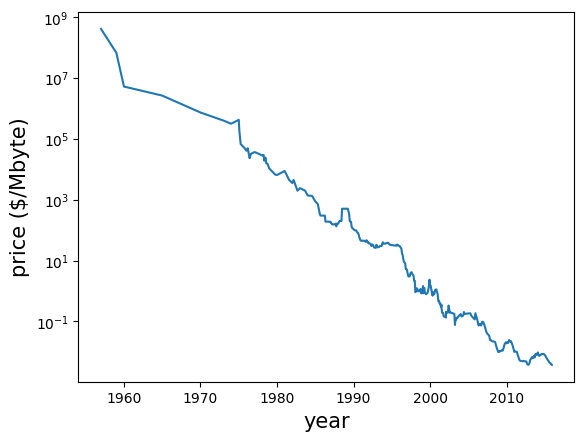

In [2]:
import matplotlib.pyplot as plt

#y축 로그 스케일
plt.semilogy(df['date'], df['price'])
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)

# x축 날짜, y축 램 가격
#시간이 지날수록 램 가격은 점차 하락하고 있음

In [3]:
import numpy as np

#학습용과 검증용 구분(2000년 이전과 이후로 구분)
X_train0 = df[df['date'] < 2000]
X_test = df[df['date'] >= 2000]
y_test = df[df['price'] >= 2000]

#기계학습모형에는 2차원 형태의 데이터가 입력되어야 함
X_train = X_train0['date'].values # date 필드만을 선택하여 2차원으로 변환
X_test = X_test['data'].values

# y값을 로그 스케일로 변환
y_train = np.log(X_train0['price'])
y_test = np.log(X_test['price'])

In [4]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# tree = DecisionTreeRegressor().fit(X_train, y_train)
# lr = LinearRegression().fit(X_train, y_train) #선형회귀모형
# #svr = SVR(kernel='linear').fit(X_train, y_train)  
# svr = SVR(kernel='rbf').fit(X_train, y_train)

tree = DecisionTreeRegressor().fit(X_train.reshape(-1,1), y_train)
#                                                  행,열
lr = LinearRegression().fit(X_train.reshape(-1,1), y_train)
svr = SVR(kernel='rbf').fit(X_train.reshape(-1,1), y_train)
#               =linear 선형
#               =rbf    비선형


#전체 기간의 자료
x_all = np.array(df['date']).reshape(-1, 1)
pred_tree = tree.predict(x_all)
price_tree = np.exp(pred_tree) # log값 되돌리기

pred_lr = lr.predict(x_all)
price_lr = np.exp(pred_lr) # log값 되돌리기

pred_svr = svr.predict(x_all)
price_svr = np.exp(pred_svr) # log값 되돌리기

In [5]:
from sklearn.metrics import mean_squared_error

y_pred = tree.predict(X_test['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

y_pred = lr.predict(X_test['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

y_pred = svr.predict(X_test['price'].values.reshape(-1,1))
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

ValueError: Found input variables with inconsistent numbers of samples: [30, 131]

Text(0, 0.5, 'price ($/Mbyte)')

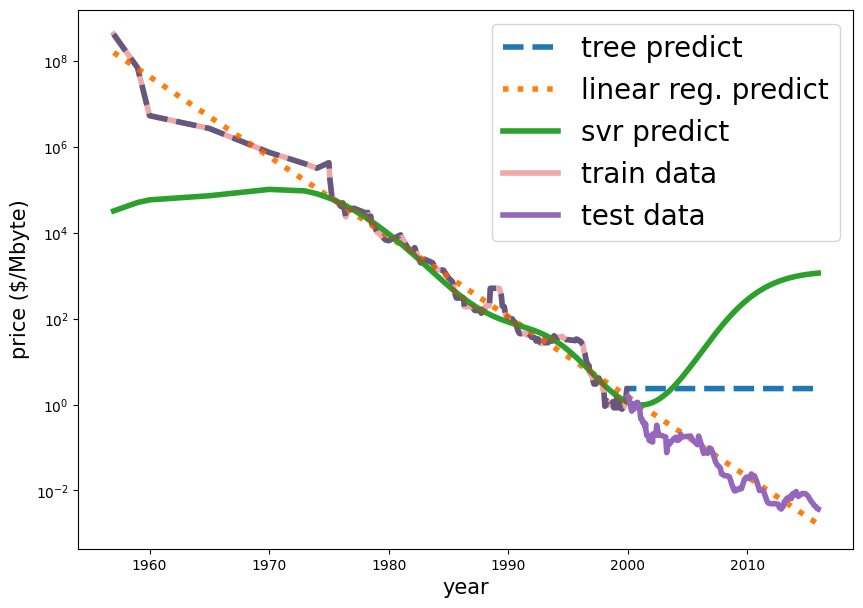

In [ ]:
#실제값과 결정트리모형의 예측값, 선형회귀모형의 예측값 비교

plt.figure(figsize=(10,7))
plt.semilogy(df['date'], price_tree, label='tree predict', lw='4', ls='--')
plt.semilogy(df['date'], price_lr, label='linear reg. predict', lw='4', ls=':')
plt.semilogy(df['date'], price_svr,label='svr predict',lw='4',ls='-')
plt.semilogy(X_train0['date'], X_train0['price'], label='train data', lw='4', alpha=0.4)
plt.semilogy(X_test['date'], X_test['price'], lw='4', label='test data')
plt.legend(loc=1, fontsize=20)
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)

# 선형회귀모형: 직선모양
# 결정트리모형은 학습용 데이터의 범위를 벗어나는 새로운 데이터를 예측할 능력이 없음(트리 모형의 단점)
# 새로운 데이터를 예측하려면 시계열분석, 순환신경망(RNN) 등을 사용하여 분석하는 방법을 사용해야 함